In [1]:
# !pip install fasteda
# from fasteda import fast_eda
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE

In [2]:
train = pd.read_csv("./train.csv").drop('id',axis=1)
test = pd.read_csv("./test.csv").drop('id',axis=1)
original = pd.read_csv("./ConcreteStrengthData.csv")

In [3]:
original = original.rename(columns={'CementComponent ':'CementComponent'})

In [4]:
print(original.columns)
print(train.columns)

Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')
Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')


In [5]:
print(len(train))
print(len(test))

5407
3605


In [6]:
train = pd.concat([train,original],axis=0)
train = train.drop_duplicates().reset_index(drop=True)
train = train[train['AgeInDays'] != 49]


In [7]:
# Calculate TotalComponentWeight
train['TotalComponentWeight'] = train['CementComponent'] + train['BlastFurnaceSlag'] + train['FlyAshComponent'] + train['WaterComponent'] + train['SuperplasticizerComponent'] + train['CoarseAggregateComponent'] + train['FineAggregateComponent']

# Calculate Water-Cement-Ratio (WCR)
train['WCR'] = train['WaterComponent'] / train['CementComponent']

# Calculate Aggregate-Ratio (AR)
train['AR'] = (train['CoarseAggregateComponent'] + train['FineAggregateComponent']) / train['CementComponent']

# Calculate Water-Cement-Plus-Pozzolan-Ratio (WCPR)
train['WCPR'] = train['WaterComponent'] / (train['CementComponent'] + train['BlastFurnaceSlag'] + train['FlyAshComponent'])

# Calculate Cement-Age
train['Cement-Age'] = train['CementComponent'] * train['AgeInDays']

In [8]:
# Calculate TotalComponentWeight
test['TotalComponentWeight'] = test['CementComponent'] + test['BlastFurnaceSlag'] + test['FlyAshComponent'] + test['WaterComponent'] + test['SuperplasticizerComponent'] + test['CoarseAggregateComponent'] + test['FineAggregateComponent']

# Calculate Water-Cement-Ratio (WCR)
test['WCR'] = test['WaterComponent'] / test['CementComponent']

# Calculate Aggregate-Ratio (AR)
test['AR'] = (test['CoarseAggregateComponent'] + test['FineAggregateComponent']) / test['CementComponent']

# Calculate Water-Cement-Plus-Pozzolan-Ratio (WCPR)
test['WCPR'] = test['WaterComponent'] / (test['CementComponent'] + test['BlastFurnaceSlag'] + test['FlyAshComponent'])

# Calculate Cement-Age
test['Cement-Age'] = test['CementComponent'] * test['AgeInDays']

In [9]:
# train['Unknown'] = (train.CoarseAggregateComponent) - (train.CementComponent + train.BlastFurnaceSlag + train.FlyAshComponent)
# test['Unknown'] = (test.CoarseAggregateComponent) - (test.CementComponent + test.BlastFurnaceSlag + test.FlyAshComponent)

In [10]:
print(len(train))
print(len(test))

6411
3605


In [11]:
train

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,TotalComponentWeight,WCR,AR,WCPR,Cement-Age
0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38,2449.0,0.354286,3.310476,0.354286,1575.0
1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52,2264.0,1.335664,11.258741,0.419780,4004.0
2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96,2479.7,0.642561,6.471626,0.438282,8092.0
3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05,2210.0,0.750000,5.269737,0.600000,110960.0
4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19,2301.6,1.222930,10.933758,0.488550,14130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6407,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,2309.6,0.649783,5.927641,0.372074,7739.2
6408,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,2275.5,0.608318,5.063004,0.447693,9021.6
6409,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,2267.7,1.297643,11.261953,0.486003,4158.0
6410,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,2311.2,1.103708,11.178504,0.507808,4454.8


In [12]:
print([i for i in sorted(train.AgeInDays.unique())])
print([i for i in sorted(test.AgeInDays.unique())])


[1, 3, 7, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]
[1, 3, 7, 11, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]


In [13]:
test.loc[197,'AgeInDays'] = 14

In [14]:
print([i for i in sorted(train.AgeInDays.unique())])
print([i for i in sorted(test.AgeInDays.unique())])


[1, 3, 7, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]
[1, 3, 7, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]


In [15]:
print(len(train))
print(len(test))

6411
3605


In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit([i for i in sorted(train.AgeInDays.unique())])
train.AgeInDays = encoder.transform(train.AgeInDays)
test.AgeInDays = encoder.transform(test.AgeInDays)

In [17]:
from sklearn.preprocessing import StandardScaler

standard_target = ['CementComponent','BlastFurnaceSlag','FlyAshComponent','WaterComponent',
                  'SuperplasticizerComponent','CoarseAggregateComponent','FineAggregateComponent',
                  'TotalComponentWeight','WCR','AR','WCPR','Cement-Age']

for i in standard_target:
    tar = np.array([i for i in train[f'{i}']]).reshape(-1,1)
    encoder = StandardScaler()
    encoder.fit(tar)
    train[f'{i}'] = encoder.transform(np.array(train[f'{i}']).reshape(-1,1))
    test[f'{i}'] = encoder.transform(np.array(test[f'{i}']).reshape(-1,1))

In [18]:
train = train.reset_index(drop=True)

In [19]:
drop_list = []

for tar in standard_target:
    for i in range(len(train)):
        if abs(train.loc[i,tar]) > 2.58:
            drop_list.append(i)

In [20]:
train = train.drop(sorted(list(set(drop_list)))).reset_index(drop=True)

In [21]:
train.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,TotalComponentWeight,WCR,AR,WCPR,Cement-Age
count,5615.000000,5615.000000,5615.000000,5615.000000,5615.000000,5615.000000,5615.000000,5615.000000,5615.000000,5615.000000,5615.000000,5615.000000,5615.000000,5615.000000
mean,-0.001256,-0.049490,0.030793,-0.018549,-0.020613,0.039544,0.039607,4.054853,34.974442,0.039569,-0.047804,-0.030738,-0.024528,-0.154607
std,0.946527,0.940648,0.997618,0.919655,0.891369,0.974718,0.934305,2.227492,16.272222,0.854094,0.892435,0.915226,0.843277,0.557309
min,-1.552393,-0.722833,-0.625603,-2.461219,-0.764131,-2.430530,-2.247139,0.000000,2.330000,-2.568198,-1.530013,-1.415939,-1.916473,-0.618803
25%,-0.777782,-0.722833,-0.625603,-0.610234,-0.764131,-0.628223,-0.345192,2.000000,23.350000,-0.564187,-0.669310,-0.755071,-0.673573,-0.523969
50%,-0.002224,-0.722833,-0.625603,0.073369,-0.764131,-0.106638,0.127128,4.000000,33.660000,0.088889,-0.299173,-0.317688,-0.057652,-0.325887
75%,0.631291,0.717827,1.057323,0.388877,0.743608,0.745456,0.627307,5.000000,44.625000,0.647424,0.405056,0.592285,0.491352,-0.070254
max,2.311193,2.525201,2.576704,2.281930,2.528633,2.010686,2.488733,13.000000,82.600000,2.545699,2.561075,2.463228,2.526079,2.481015


C:\Users\User\AppData\Local\Temp\ipykernel_9248\536370139.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


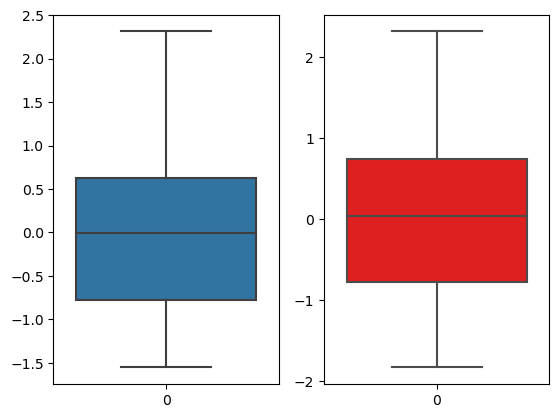

C:\Users\User\AppData\Local\Temp\ipykernel_9248\536370139.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


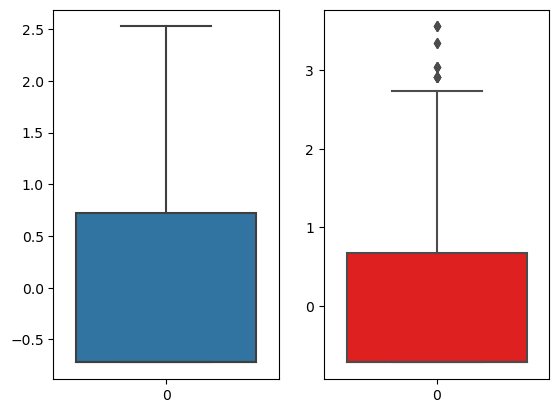

C:\Users\User\AppData\Local\Temp\ipykernel_9248\536370139.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


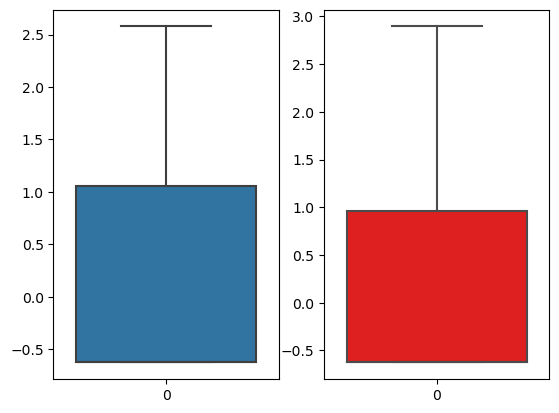

C:\Users\User\AppData\Local\Temp\ipykernel_9248\536370139.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


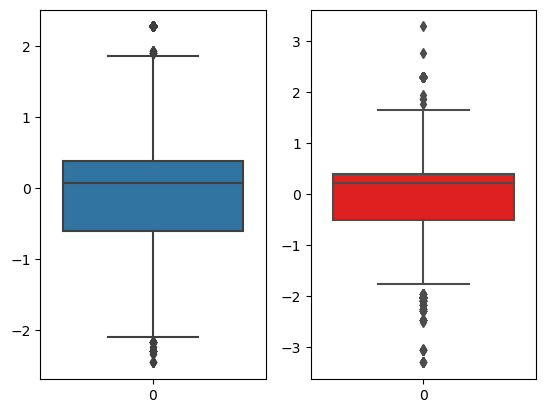

C:\Users\User\AppData\Local\Temp\ipykernel_9248\536370139.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


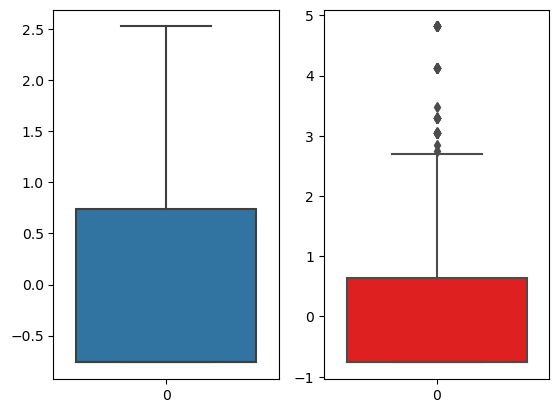

C:\Users\User\AppData\Local\Temp\ipykernel_9248\536370139.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


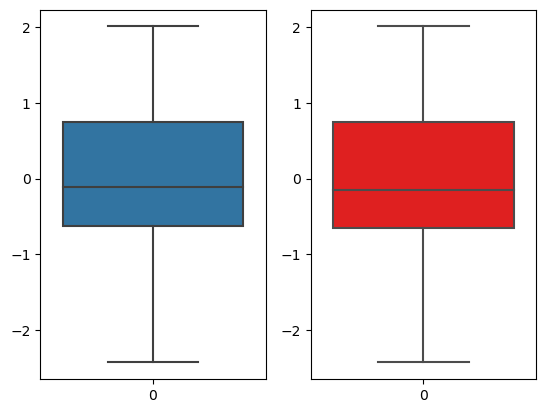

C:\Users\User\AppData\Local\Temp\ipykernel_9248\536370139.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


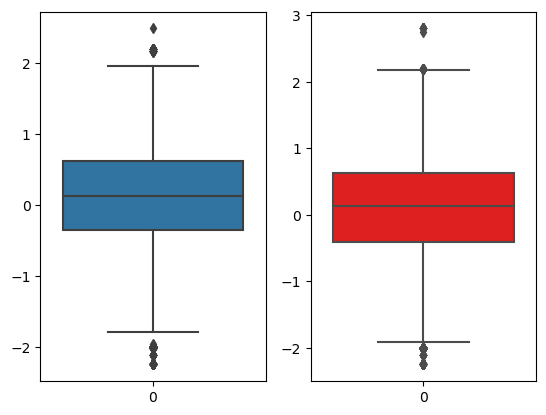

C:\Users\User\AppData\Local\Temp\ipykernel_9248\536370139.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


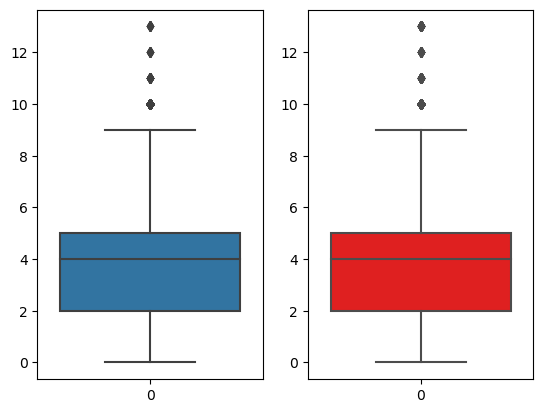

C:\Users\User\AppData\Local\Temp\ipykernel_9248\536370139.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


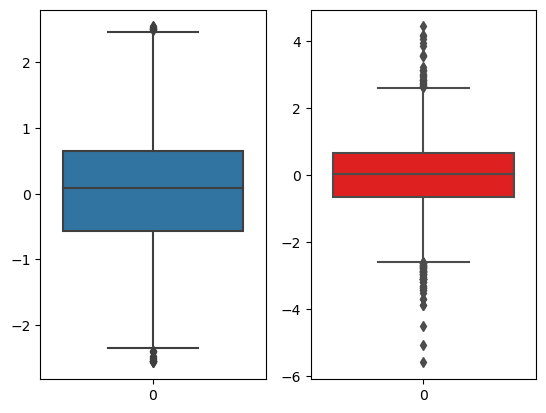

C:\Users\User\AppData\Local\Temp\ipykernel_9248\536370139.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


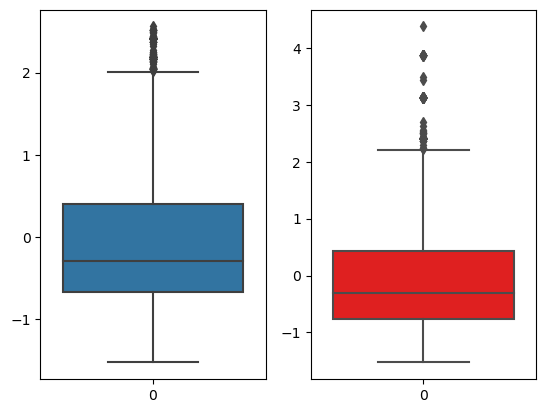

C:\Users\User\AppData\Local\Temp\ipykernel_9248\536370139.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


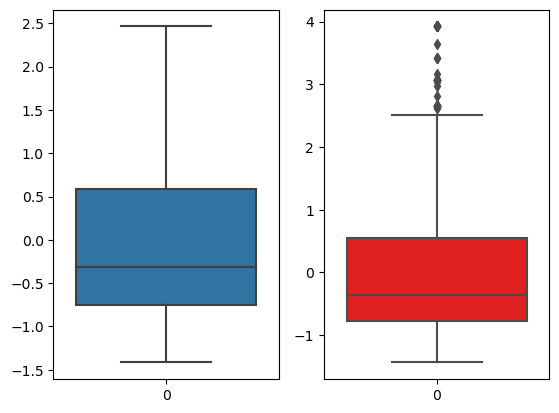

C:\Users\User\AppData\Local\Temp\ipykernel_9248\536370139.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


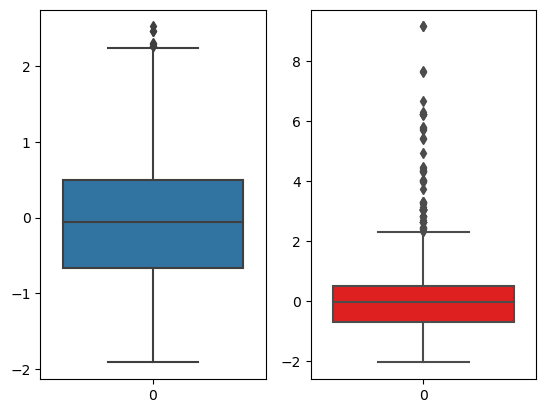

C:\Users\User\AppData\Local\Temp\ipykernel_9248\536370139.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


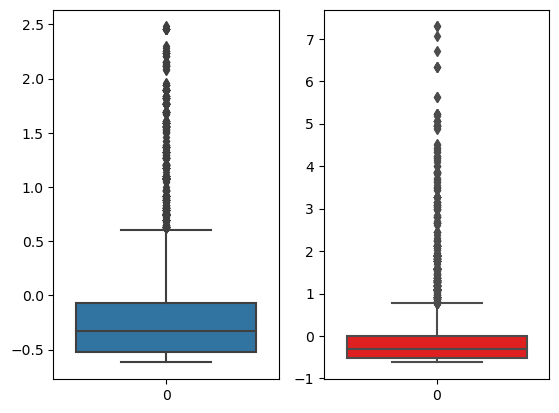

In [22]:
for i in test.columns:
    plt.title(f'{i}')
    plt.subplot(1,2,1)
    sns.boxplot(train[f'{i}'],)#.plot.hist(bins=100,grid='on',figsize=(5,5))
    
    plt.subplot(1,2,2)
    sns.boxplot(test[f'{i}'],color='red')#.plot.hist(bins=100,grid='on',figsize=(5,5))
    plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_9248\1322950834.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\User\AppData\Local\Temp\ipykernel_9248\1322950834.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test

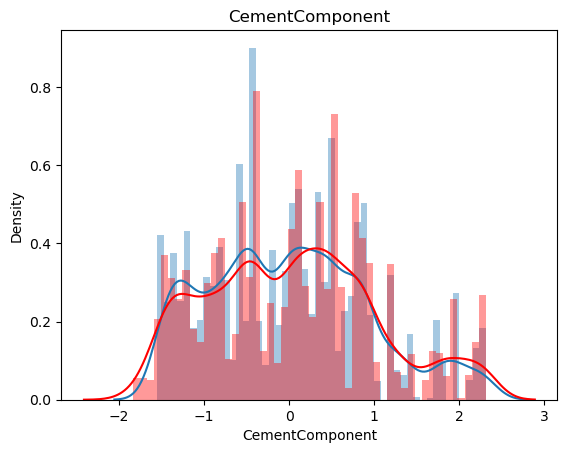

C:\Users\User\AppData\Local\Temp\ipykernel_9248\1322950834.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\User\AppData\Local\Temp\ipykernel_9248\1322950834.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test

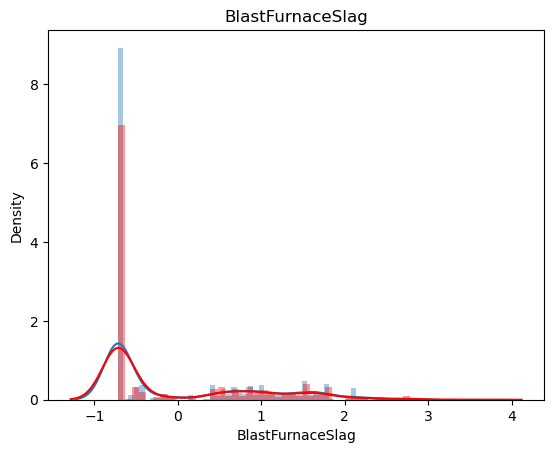

C:\Users\User\AppData\Local\Temp\ipykernel_9248\1322950834.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\User\AppData\Local\Temp\ipykernel_9248\1322950834.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test

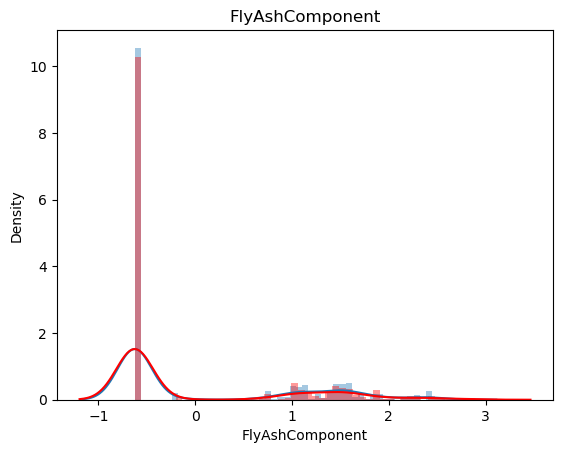

C:\Users\User\AppData\Local\Temp\ipykernel_9248\1322950834.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\User\AppData\Local\Temp\ipykernel_9248\1322950834.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test

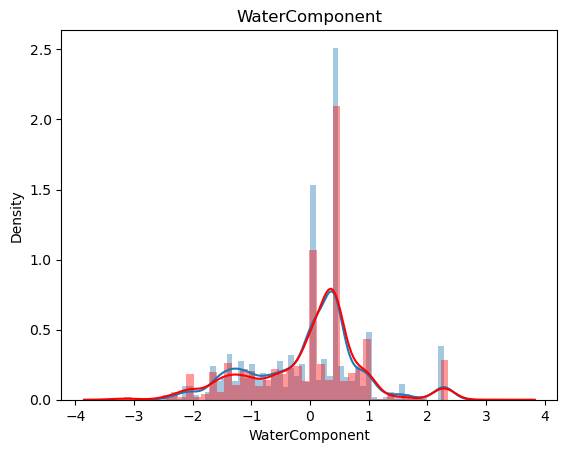

C:\Users\User\AppData\Local\Temp\ipykernel_9248\1322950834.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\User\AppData\Local\Temp\ipykernel_9248\1322950834.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test

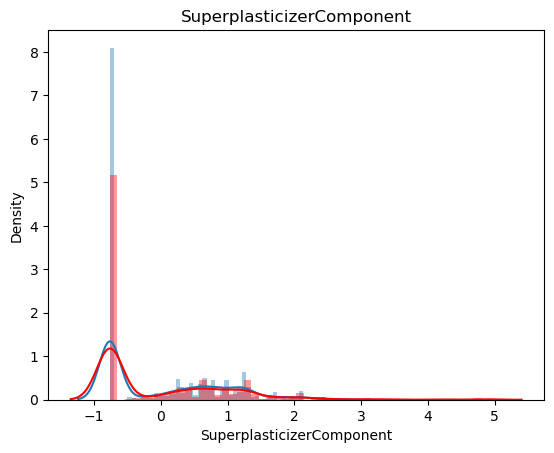

C:\Users\User\AppData\Local\Temp\ipykernel_9248\1322950834.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\User\AppData\Local\Temp\ipykernel_9248\1322950834.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test

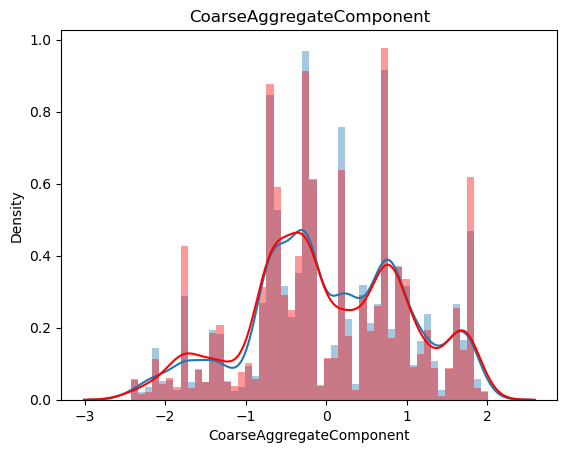

C:\Users\User\AppData\Local\Temp\ipykernel_9248\1322950834.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\User\AppData\Local\Temp\ipykernel_9248\1322950834.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test

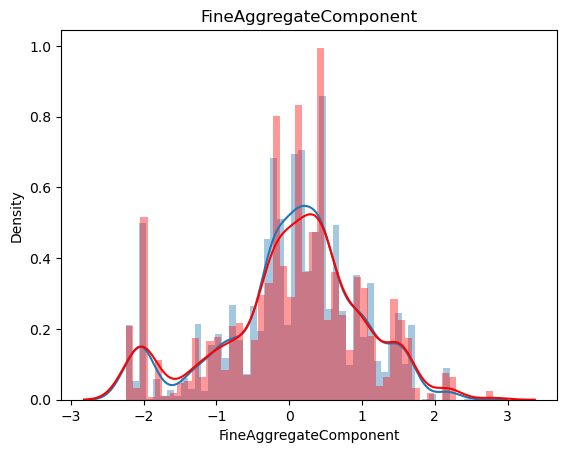

C:\Users\User\AppData\Local\Temp\ipykernel_9248\1322950834.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\User\AppData\Local\Temp\ipykernel_9248\1322950834.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test

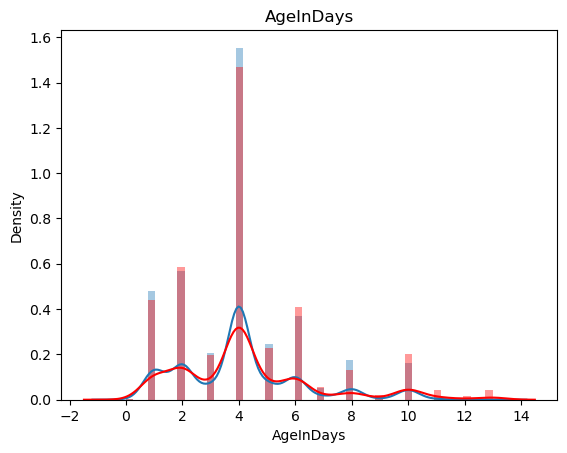

C:\Users\User\AppData\Local\Temp\ipykernel_9248\1322950834.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\User\AppData\Local\Temp\ipykernel_9248\1322950834.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test

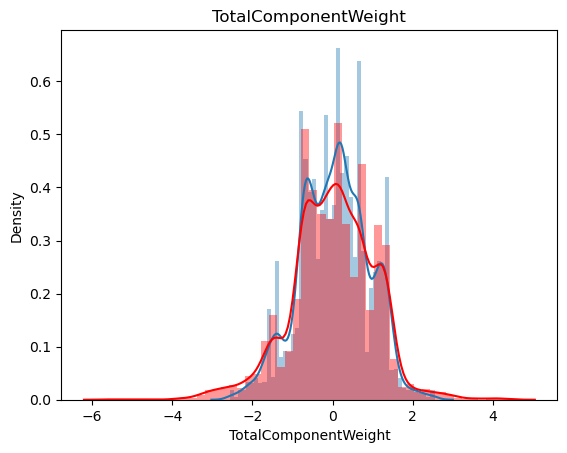

C:\Users\User\AppData\Local\Temp\ipykernel_9248\1322950834.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\User\AppData\Local\Temp\ipykernel_9248\1322950834.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test

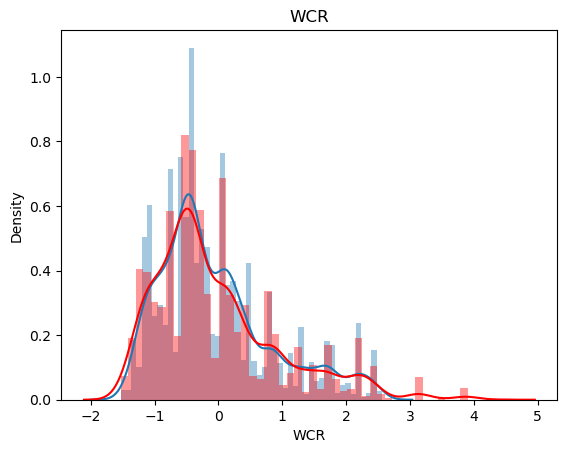

C:\Users\User\AppData\Local\Temp\ipykernel_9248\1322950834.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\User\AppData\Local\Temp\ipykernel_9248\1322950834.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test

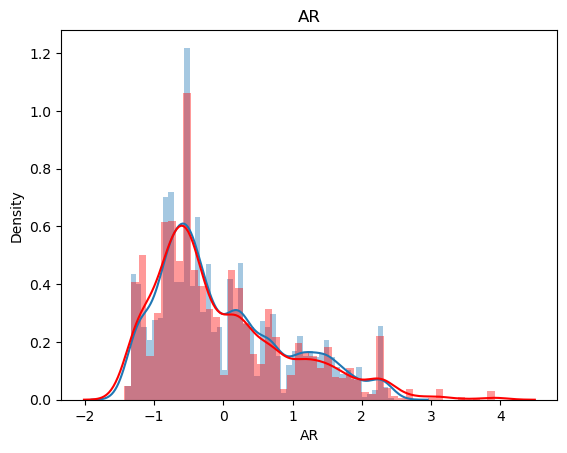

C:\Users\User\AppData\Local\Temp\ipykernel_9248\1322950834.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\User\AppData\Local\Temp\ipykernel_9248\1322950834.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test

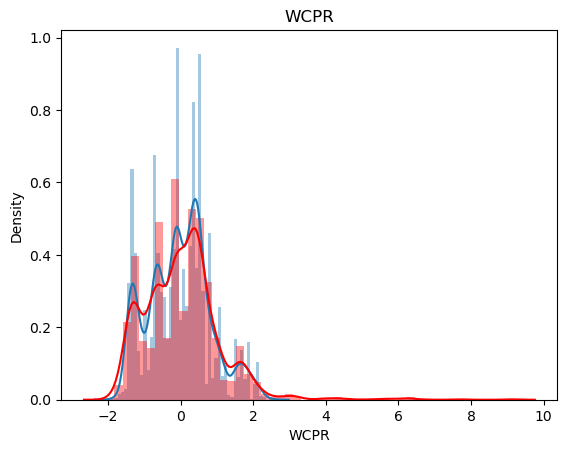

C:\Users\User\AppData\Local\Temp\ipykernel_9248\1322950834.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
C:\Users\User\AppData\Local\Temp\ipykernel_9248\1322950834.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test

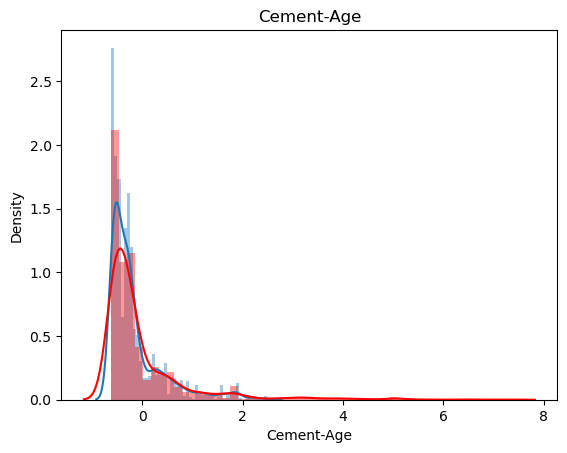

In [23]:
# 콘크리트의 강도는 물과 시멘트의 비율이 낮아지면 증가합니다.
# CementComponent:- Amount of cement is mixed
# BlastFurnaceSlag:- Amount of Blast Furnace Slag is mixed
# FlyAshComponent:- Amount of FlyAsh is mixed
# WaterComponent:- Amount of water is mixed
# SuperplasticizerComponent:- Amount of Super plasticizer is mixed
# CoarseAggregateComponent:- Amount of Coarse Aggregate is mixed
# FineAggregateComponent:- Amount of Coarse Aggregate is mixed
# AgeInDays:- How many days it was left dry
# Strength:- What was the final strength of concrete- (Target)
for i in test.columns:
    plt.title(f'{i}')
    sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
    sns.distplot(test[f'{i}'],color='red',bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
    plt.show()


In [24]:
train = train.reset_index(drop=True)

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import optuna
from optuna.samplers import TPESampler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

In [26]:
target = 'Strength'
features = [c for c in train.columns if c not in [target]]

In [34]:
kf = KFold(n_splits = 10, random_state = 41, shuffle = True)
models = []
val_scores = []
preds = []

params = {
'n_estimators':15000,
'max_depth':6,
'early_stopping_rounds':200,
'learning_rate':0.01,
'one_hot_max_size':3,
'bootstrap_type':"MVS",
'l2_leaf_reg':2,
'random_state':41
         }

for i, (train_index, val_index) in tqdm(enumerate(kf.split(train, train[target]))):
    
    X_train, X_val = train[features].loc[train_index], train[features].loc[val_index]
    y_train, y_val = train[target][train_index], train[target][val_index]
    
#     if include_orig:
#         X_train = X_train.append(original[features], ignore_index = True)
#         y_train = y_train.append(original[target], ignore_index = True)
    
    model = CatBoostRegressor(**params)
    
    model.fit(X_train, y_train, eval_set = [(X_val, y_val)], verbose = 2000)
    
    models.append(model)
    # pred = model.predict_proba(X_val)[:,1]
    # score = accuracy_score(y_val, model.predict(X_val))
    score = mean_squared_error(y_val, model.predict(X_val))

    val_scores.append(score)
    
    print(f'mse on fold {i}: {score:.4f}')
    
print(f'mean mse across all folds: {np.mean(val_scores):.4f}')

0it [00:00, ?it/s]C:\Users\User\anaconda3\envs\'ml'\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 16.2635521	test: 15.5947931	best: 15.5947931 (0)	total: 8.66ms	remaining: 2m 9s


1it [00:06,  6.61s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 10.74565876
bestIteration = 628

Shrink model to first 629 iterations.
mse on fold 0: 115.4692
0:	learn: 16.2395851	test: 15.8496189	best: 15.8496189 (0)	total: 8.66ms	remaining: 2m 9s


C:\Users\User\anaconda3\envs\'ml'\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
2it [00:10,  5.04s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 11.71553942
bestIteration = 296

Shrink model to first 297 iterations.
mse on fold 1: 137.2539
0:	learn: 16.1507835	test: 16.6541453	best: 16.6541453 (0)	total: 8.87ms	remaining: 2m 13s


C:\Users\User\anaconda3\envs\'ml'\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
3it [00:25,  9.45s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 11.93494935
bestIteration = 1687

Shrink model to first 1688 iterations.
mse on fold 2: 142.4430
0:	learn: 16.2244459	test: 15.9988403	best: 15.9988403 (0)	total: 8.49ms	remaining: 2m 7s


C:\Users\User\anaconda3\envs\'ml'\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
4it [00:30,  7.88s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 11.65682482
bestIteration = 483

Shrink model to first 484 iterations.
mse on fold 3: 135.8816
0:	learn: 16.1614123	test: 16.5639488	best: 16.5639488 (0)	total: 8.12ms	remaining: 2m 1s


C:\Users\User\anaconda3\envs\'ml'\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
5it [00:45, 10.23s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 10.98482483
bestIteration = 1629

Shrink model to first 1630 iterations.
mse on fold 4: 120.6664
0:	learn: 16.2406783	test: 15.8320013	best: 15.8320013 (0)	total: 8.49ms	remaining: 2m 7s


C:\Users\User\anaconda3\envs\'ml'\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
6it [00:57, 10.84s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 11.28325755
bestIteration = 1345

Shrink model to first 1346 iterations.
mse on fold 5: 127.3119
0:	learn: 16.1671561	test: 16.5114894	best: 16.5114894 (0)	total: 7.99ms	remaining: 1m 59s


C:\Users\User\anaconda3\envs\'ml'\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
7it [01:05,  9.87s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 11.26074423
bestIteration = 795

Shrink model to first 796 iterations.
mse on fold 6: 126.8044
0:	learn: 16.1403201	test: 16.7452136	best: 16.7452136 (0)	total: 8.48ms	remaining: 2m 7s


C:\Users\User\anaconda3\envs\'ml'\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
8it [01:13,  9.45s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 12.24076821
bestIteration = 952

Shrink model to first 953 iterations.
mse on fold 7: 149.8364
0:	learn: 16.2157957	test: 16.0790087	best: 16.0790087 (0)	total: 9.23ms	remaining: 2m 18s


C:\Users\User\anaconda3\envs\'ml'\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


2000:	learn: 10.3069990	test: 11.3805179	best: 11.3797410 (1979)	total: 14.7s	remaining: 1m 35s


9it [01:34, 13.18s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 11.35656669
bestIteration = 2599

Shrink model to first 2600 iterations.
mse on fold 8: 128.9716
0:	learn: 16.2034520	test: 16.1776962	best: 16.1776962 (0)	total: 9.47ms	remaining: 2m 22s


C:\Users\User\anaconda3\envs\'ml'\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


2000:	learn: 10.2594881	test: 11.9724437	best: 11.9693461 (1849)	total: 15s	remaining: 1m 37s


10it [01:51, 11.11s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 11.96934613
bestIteration = 1849

Shrink model to first 1850 iterations.
mse on fold 9: 143.2652
mean mse across all folds: 132.7904


In [36]:
np.array([i**(1/2) for i in val_scores]).mean()

11.514848004115148

In [35]:
models

In [41]:
kf = KFold(n_splits = 10, random_state = 41, shuffle = True)
models = []
val_scores = []
preds = []

params = {
'n_estimators':200,
'max_depth':6,
#'early_stopping_rounds':200,
'learning_rate':0.01,
#'one_hot_max_size':3,
#'bootstrap_type':"MVS",
#'l2_leaf_reg':2,
'random_state':41
         }

for i, (train_index, val_index) in tqdm(enumerate(kf.split(train, train[target]))):
    
    X_train, X_val = train[features].loc[train_index], train[features].loc[val_index]
    y_train, y_val = train[target][train_index], train[target][val_index]
    
#     if include_orig:
#         X_train = X_train.append(original[features], ignore_index = True)
#         y_train = y_train.append(original[target], ignore_index = True)
    
    model = GradientBoostingRegressor(**params)
    
    model.fit(X_train, y_train)
    
    models.append(model)
    # pred = model.predict_proba(X_val)[:,1]
    # score = accuracy_score(y_val, model.predict(X_val))
    score = mean_squared_error(y_val, model.predict(X_val))

    val_scores.append(score)
    
    print(f'mse on fold {i}: {score:.4f}')
    
print(f'mean mse across all folds: {np.mean(val_scores):.4f}')

1it [00:07,  7.71s/it]

mse on fold 0: 118.9612


2it [00:15,  7.98s/it]

mse on fold 1: 145.5422


3it [00:24,  8.27s/it]

mse on fold 2: 151.8331


4it [00:33,  8.40s/it]

mse on fold 3: 141.5208


5it [00:41,  8.45s/it]

mse on fold 4: 130.6043


6it [00:50,  8.53s/it]

mse on fold 5: 130.7569


7it [00:58,  8.57s/it]

mse on fold 6: 133.7221


8it [01:07,  8.59s/it]

mse on fold 7: 152.2039


9it [01:16,  8.57s/it]

mse on fold 8: 136.5101


10it [01:24,  8.48s/it]

mse on fold 9: 147.9183
mean mse across all folds: 138.9573


In [42]:
np.array([i**(1/2) for i in val_scores]).mean()

11.779929184583171

In [32]:
# kf = KFold(n_splits = 10, random_state = 5, shuffle = True)
# models = []
# val_scores = []
# preds = []

# include_orig = True

# xgb_params = {'n_estimators'     : 3000,
#               'min_child_weight' : 96,
#               'max_depth'        : 7,
#               'learning_rate'    : 0.05,
#               'subsample'        : 0.95,
#               'colsample_bytree' : 0.95,
#               'reg_lambda'       : 1.50,
#               'reg_alpha'        : 1.50,
#               'gamma'            : 1.50,
#               'max_bin'          : 512,
#               'random_state'     : 41,
#               # 'objective'        : 'binary:logistic',
#               'tree_method'      : 'hist',
#               'eval_metric'      : 'auc'
#              }
# # xgb_params = {'max_depth': 3,
# #  'learning_rate': 0.09457198987172621,
# #  'min_child_weight': 9,
# #  'gamma': 0.3126168664550514,
# #  'subsample': 0.5585879695479943,
# #  'colsample_bytree': 0.46793424854801835,
# #  'reg_alpha': 0.21235299325212031,
# #  'reg_lambda': 0.4236760707956293,
# #  'n_estimators': 606}

# for i, (train_index, val_index) in tqdm(enumerate(kf.split(train, train[target]))):
    
#     X_train, X_val = train[features].loc[train_index], train[features].loc[val_index]
#     y_train, y_val = train[target][train_index], train[target][val_index]
    
# #     if include_orig:
# #         X_train = X_train.append(original[features], ignore_index = True)
# #         y_train = y_train.append(original[target], ignore_index = True)
    
#     model = XGBRegressor(**xgb_params)
    
#     model.fit(X_train, y_train)
    
#     models.append(model)
#     pred = model.predict(X_val)
#     # score = roc_auc_score(y_val, pred)
#     score = mean_squared_error(y_val, model.predict(X_val))

#     val_scores.append(score)
    
#     print(f'score on fold {i}: {score:.4f}')
    
# print(f'mean score across all folds: {np.mean(val_scores):.4f}')

1it [00:10, 10.25s/it]

score on fold 0: 155.9083


2it [00:20, 10.33s/it]

score on fold 1: 154.3317


3it [00:30, 10.25s/it]

score on fold 2: 148.0166


4it [00:40, 10.19s/it]

score on fold 3: 147.0189


5it [00:51, 10.18s/it]

score on fold 4: 155.5145


6it [01:01, 10.19s/it]

score on fold 5: 146.3133


7it [01:11, 10.19s/it]

score on fold 6: 162.7481


8it [01:21, 10.29s/it]

score on fold 7: 159.7349


9it [01:32, 10.26s/it]

score on fold 8: 147.5405


10it [01:42, 10.24s/it]

score on fold 9: 155.0466
mean score across all folds: 153.2173


In [33]:
np.array([i**(1/2) for i in val_scores]).mean()

12.376155022168403

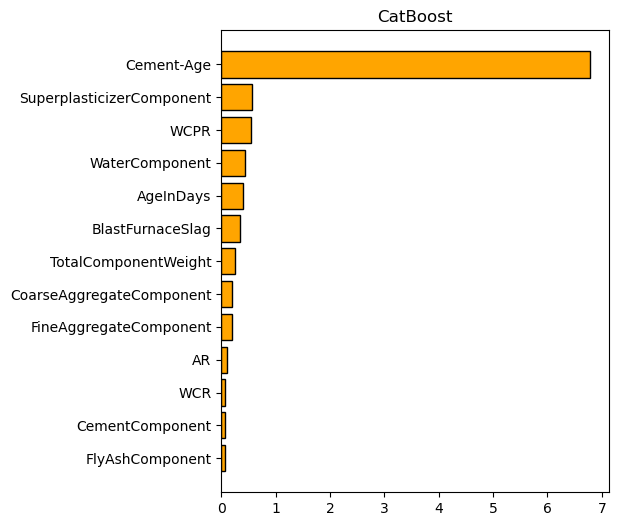

In [43]:
plt.figure(figsize = (5, 6))
cat_imp = np.zeros(len(models[0].feature_importances_))
for model in models[:10]:
    cat_imp += model.feature_importances_
    
plt.barh([features[i] for i in np.argsort(cat_imp)], sorted(cat_imp), 
         color = "orange", edgecolor = "#000000")

plt.title("CatBoost")
plt.show()

In [44]:
models

[GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=200,
                           random_state=41),
 GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=200,
                           random_state=41),
 GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=200,
                           random_state=41),
 GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=200,
                           random_state=41),
 GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=200,
                           random_state=41),
 GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=200,
                           random_state=41),
 GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=200,
                           random_state=41),
 GradientBoostingRegressor(learning_rate=0.01, max_depth=6, n_estimators=200,
                           random_state=41),
 GradientBoostin

In [45]:
cat_preds = []
for model in models[:10]:
    preds = model.predict(test[features])
    cat_preds.append(preds)

<AxesSubplot: ylabel='Frequency'>

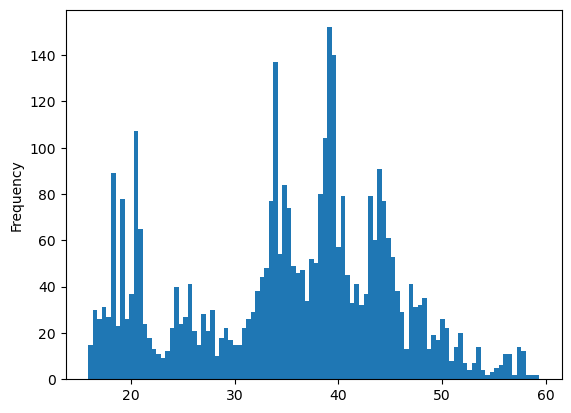

In [46]:
sub = pd.read_csv('./sample_submission.csv')
sub['Strength'] = np.array(cat_preds).mean(axis=0) #.mean(axis=0)
sub = sub.set_index('id')
sub.to_csv('./submission.csv')
sub['Strength'].plot.hist(bins=100)

In [ ]:
def cat_objective(trial):
    
    params_optuna = {
        'iterations':trial.suggest_int("iterations", 4000, 25000),
        'od_wait':trial.suggest_int('od_wait', 500, 2300),
        'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
        'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
        'subsample': trial.suggest_uniform('subsample',0,1),
        'random_strength': trial.suggest_uniform('random_strength',10,50),
        'depth': trial.suggest_int('depth',1, 15),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1,30),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1,15),
        'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.01, 100.00),
        'colsample_bylevel':trial.suggest_float('colsample_bylevel', 0.4, 1.0),
    }
    n=10
    cv = KFold(n,shuffle=True, random_state=42)
    all_scores = []
    for i,(train_idx,val_idx) in enumerate(cv.split(train[features],train[target])):
        X_train, y_train = train.loc[train_idx, features],train.loc[train_idx, target]
        X_val, y_val = train.loc[val_idx, features],train.loc[val_idx, target]

        model = CatBoostRegressor(**params_optuna)
        model.fit(X_train,
                  y_train,
                  eval_set = [(X_val,y_val)],
                  early_stopping_rounds=50,
                  verbose=500)

        y_pred = model.predict(X_val)
        score = mean_squared_error(y_val,y_pred)
        all_scores.append(score)

    return np.mean(all_scores)

In [ ]:
# study = optuna.create_study(direction='maximize', sampler = TPESampler())
# study.optimize(func=cat_objective, n_trials=50)
# study.best_params

In [ ]:
# kf = KFold(n_splits = 10, random_state = 41, shuffle = True)
# models = []
# val_scores = []
# preds = []

# params = study.best_params

# for i, (train_index, val_index) in tqdm(enumerate(kf.split(train, train[target]))):
    
#     X_train, X_val = train[features].loc[train_index], train[features].loc[val_index]
#     y_train, y_val = train[target][train_index], train[target][val_index]
    
# #     if include_orig:
# #         X_train = X_train.append(original[features], ignore_index = True)
# #         y_train = y_train.append(original[target], ignore_index = True)
    
#     model = CatBoostRegressor(**params)
    
#     model.fit(X_train, y_train, eval_set = [(X_val, y_val)], verbose = 2000)
    
#     models.append(model)
#     # pred = model.predict_proba(X_val)[:,1]
#     # score = accuracy_score(y_val, model.predict(X_val))
#     score = mean_squared_error(y_val, model.predict(X_val))

#     val_scores.append(score)
    
#     print(f'mse on fold {i}: {score:.4f}')
    
# print(f'mean mse across all folds: {np.mean(val_scores):.4f}')

In [ ]:
# np.array([i**(1/2) for i in val_scores]).mean()

> grad : underfit

> cat : overfit